In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
os.getcwd()

'/Users/regan/Documents/Springboard/Capstone2.0'

In [4]:
#show all columns
from IPython.display import display

pd.set_option('display.max_columns', None)

In [5]:
#load cleaned dataset 
pbp = pd.read_csv('pbp_active_cleaned2.csv')
pbp=pbp.rename(columns={'activeteam':'offense','active_conf':'off_conf'})
pbp.head()

,gameid,hometeam,awayteam,playid,offense,nonactive team,drive #,quarter,sec,homescore,awayscore,down,distance,yardstoendzone,zone,qb,pass yds,receiver,recyds,runner,runyds,kicker,kickyds,kickreturner,kickretyds,placekicker,pkyds,pkresult,penalty,int,fumble,td,xp result,two pt result,week,home_conf,away_conf,off_conf,home_rank,away_rank,pass,run,yards,scored,gain_loss,is_home,off_team_score,def_team_score,off_team_rank,def_team_rank,run_pass,rank_group,rank_group_def
0,401110730,tennessee volunteers,georgia state panthers,104857801,tennessee volunteers,georgia state panthers,8,4,861,20,21,1,10,76,GREEN,Jarrett Guarantano,54.0,Dominick Wood-Anderson,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,1,sec,NaN,sec,NaN,NaN,1,0,54.0,0.0,gain,1.0,20.0,21.0,NaN,NaN,pass,unranked,unranked
1,401110730,tennessee volunteers,georgia state panthers,104994406,tennessee volunteers,georgia state panthers,12,4,55,23,38,3,4,36,ORANGE,Jarrett Guarantano,18.0,Dominick Wood-Anderson,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,1,sec,NaN,sec,NaN,NaN,1,0,18.0,0.0,gain,1.0,23.0,38.0,NaN,NaN,pass,unranked,unranked
2,401110730,tennessee volunteers,georgia state panthers,101884406,tennessee volunteers,georgia state panthers,2,1,715,0,7,3,4,62,GREEN,Jarrett Guarantano,7.0,Dominick Wood-Anderson,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,1,sec,NaN,sec,NaN,NaN,1,0,7.0,0.0,gain,1.0,0.0,7.0,NaN,NaN,pass,unranked,unranked
3,401110730,tennessee volunteers,georgia state panthers,101979201,tennessee volunteers,georgia state panthers,3,1,127,7,7,1,10,46,YELLOW,Jarrett Guarantano,0.0,Dominick Wood-Anderson,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,1,sec,NaN,sec,NaN,NaN,1,0,0.0,0.0,no yards,1.0,7.0,7.0,NaN,NaN,pass,unranked,unranked
4,401110732,vanderbilt commodores,georgia bulldogs,102876901,vanderbilt commodores,georgia bulldogs,2,2,750,0,14,3,31,62,GREEN,Riley Neal,5.0,Justice Shelton-Mosley,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,1,sec,sec,sec,NaN,3.0,1,0,5.0,0.0,gain,1.0,0.0,14.0,NaN,3.0,pass,unranked,top 5


In [6]:
#keep only relevant columns
pbp = pbp[['offense', 'drive #', 'quarter',
                  'down','distance','yardstoendzone','zone','penalty','int','fumble','td','week',
                  'off_conf','yards','scored','gain_loss','is_home','def_team_score','off_team_score',
           'run_pass','rank_group','rank_group_def']]

In [7]:
#check for missing values 
pbp.isna().sum()

offense           0
drive #           0
quarter           0
down              0
distance          0
yardstoendzone    0
zone              0
penalty           0
int               0
fumble            0
td                0
week              0
off_conf          0
yards             0
scored            0
gain_loss         0
is_home           0
def_team_score    0
off_team_score    0
run_pass          0
rank_group        0
rank_group_def    0
dtype: int64

In [8]:
pbp.dtypes

offense            object
drive #             int64
quarter             int64
down                int64
distance            int64
yardstoendzone      int64
zone               object
penalty             int64
int                 int64
fumble              int64
td                  int64
week                int64
off_conf           object
yards             float64
scored            float64
gain_loss          object
is_home           float64
def_team_score    float64
off_team_score    float64
run_pass           object
rank_group         object
rank_group_def     object
dtype: object

<h2 style="background-color:#FAFAD2;"><center><br>Create dummy variables</center>
</h2>

In [10]:
#create dummy variables
pbp_dum = pd.get_dummies(data=pbp, columns=['offense','zone','off_conf','gain_loss','run_pass','rank_group','rank_group_def'])

pbp_dum.head()

,drive #,quarter,down,distance,yardstoendzone,penalty,int,fumble,td,week,yards,scored,is_home,def_team_score,off_team_score,offense_alabama crimson tide,offense_arkansas razorbacks,offense_auburn tigers,offense_florida gators,offense_georgia bulldogs,offense_illinois fighting illini,offense_indiana hoosiers,offense_iowa hawkeyes,offense_kentucky wildcats,offense_lsu tigers,offense_maryland terrapins,offense_michigan state spartans,offense_michigan wolverines,offense_minnesota golden gophers,offense_mississippi state bulldogs,offense_missouri tigers,offense_nebraska cornhuskers,offense_northwestern wildcats,offense_ohio state buckeyes,offense_ole miss rebels,offense_penn state nittany lions,offense_purdue boilermakers,offense_rutgers scarlet knights,offense_south carolina gamecocks,offense_tennessee volunteers,offense_texas a&m aggies,offense_vanderbilt commodores,offense_wisconsin badgers,zone_BLUE,zone_DARK-RED,zone_GREEN,zone_ORANGE,zone_ORANGE-RED,zone_RED,zone_YELLOW,off_conf_big ten,off_conf_sec,gain_loss_gain,gain_loss_loss,gain_loss_no yards,run_pass_other,run_pass_pass,run_pass_run,rank_group_11 to 15,rank_group_16 to 20,rank_group_21 to 25,rank_group_6 to 10,rank_group_top 5,rank_group_unranked,rank_group_def_11 to 15,rank_group_def_16 to 20,rank_group_def_21 to 25,rank_group_def_6 to 10,rank_group_def_top 5,rank_group_def_unranked
0,8,4,1,10,76,0,0,0,0,1,54.0,0.0,1.0,21.0,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
1,12,4,3,4,36,0,0,0,0,1,18.0,0.0,1.0,38.0,23.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
2,2,1,3,4,62,0,0,0,0,1,7.0,0.0,1.0,7.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3,3,1,1,10,46,0,0,0,0,1,0.0,0.0,1.0,7.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4,2,2,3,31,62,0,0,0,0,1,5.0,0.0,1.0,14.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


In [11]:
pbp_dum.shape

(26540, 70)

<h2 style="background-color:#FAFAD2;"><center><br>Standardization</center>
</h2>

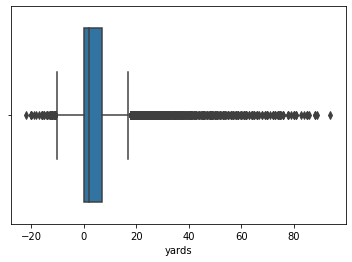

In [12]:
sns.boxplot(x='yards', data=pbp_dum);

In [13]:
#standardize yards

scaler = MinMaxScaler(feature_range=(0,100), copy=True)

pbp_dum['yards_sc'] = scaler.fit_transform(pbp_dum[['yards']].to_numpy())

pbp_dum.head()

,drive #,quarter,down,distance,yardstoendzone,penalty,int,fumble,td,week,yards,scored,is_home,def_team_score,off_team_score,offense_alabama crimson tide,offense_arkansas razorbacks,offense_auburn tigers,offense_florida gators,offense_georgia bulldogs,offense_illinois fighting illini,offense_indiana hoosiers,offense_iowa hawkeyes,offense_kentucky wildcats,offense_lsu tigers,offense_maryland terrapins,offense_michigan state spartans,offense_michigan wolverines,offense_minnesota golden gophers,offense_mississippi state bulldogs,offense_missouri tigers,offense_nebraska cornhuskers,offense_northwestern wildcats,offense_ohio state buckeyes,offense_ole miss rebels,offense_penn state nittany lions,offense_purdue boilermakers,offense_rutgers scarlet knights,offense_south carolina gamecocks,offense_tennessee volunteers,offense_texas a&m aggies,offense_vanderbilt commodores,offense_wisconsin badgers,zone_BLUE,zone_DARK-RED,zone_GREEN,zone_ORANGE,zone_ORANGE-RED,zone_RED,zone_YELLOW,off_conf_big ten,off_conf_sec,gain_loss_gain,gain_loss_loss,gain_loss_no yards,run_pass_other,run_pass_pass,run_pass_run,rank_group_11 to 15,rank_group_16 to 20,rank_group_21 to 25,rank_group_6 to 10,rank_group_top 5,rank_group_unranked,rank_group_def_11 to 15,rank_group_def_16 to 20,rank_group_def_21 to 25,rank_group_def_6 to 10,rank_group_def_top 5,rank_group_def_unranked,yards_sc
0,8,4,1,10,76,0,0,0,0,1,54.0,0.0,1.0,21.0,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,65.517241
1,12,4,3,4,36,0,0,0,0,1,18.0,0.0,1.0,38.0,23.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,34.482759
2,2,1,3,4,62,0,0,0,0,1,7.0,0.0,1.0,7.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,25.000000
3,3,1,1,10,46,0,0,0,0,1,0.0,0.0,1.0,7.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,18.965517
4,2,2,3,31,62,0,0,0,0,1,5.0,0.0,1.0,14.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,23.275862


In [14]:
#check that scaled values make sense
compare = pbp_dum[['yards','yards_sc']]
compare.head(15)

,yards,yards_sc
0,54.0,65.517241
1,18.0,34.482759
2,7.0,25.000000
3,0.0,18.965517
4,5.0,23.275862
5,23.0,38.793103
6,6.0,24.137931
7,0.0,18.965517
8,0.0,18.965517
9,0.0,18.965517


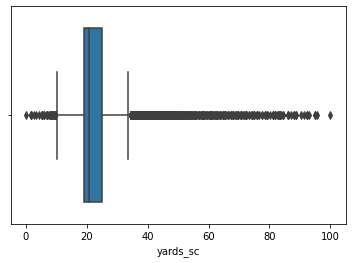

In [15]:
#check boxplot
sns.boxplot(x='yards_sc', data=pbp_dum);

<h3> check other variables for need to standardize

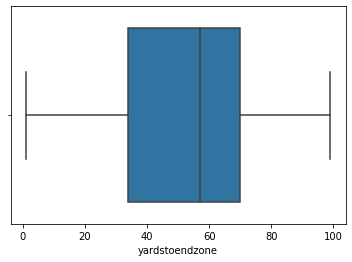

In [36]:
sns.boxplot(x='yardstoendzone', data=pbp_dum);

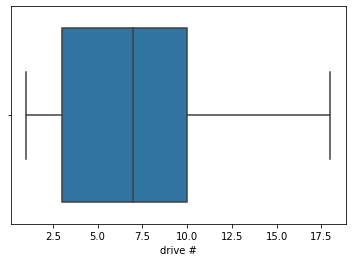

In [37]:
sns.boxplot(x='drive #', data=pbp_dum);

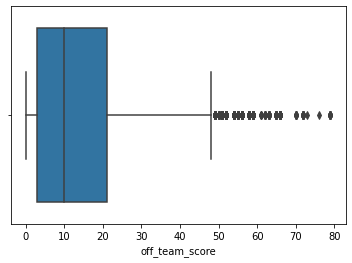

In [38]:
sns.boxplot(x='off_team_score', data=pbp_dum);

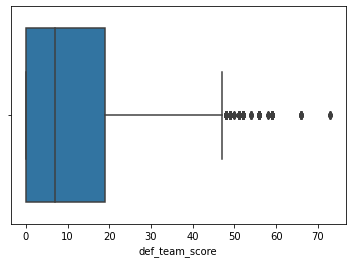

In [40]:
sns.boxplot(x='def_team_score', data=pbp_dum);

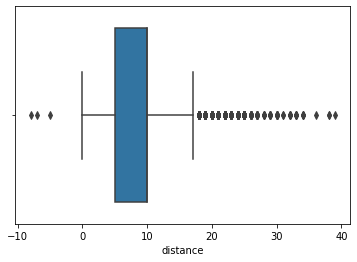

In [41]:
sns.boxplot(x='distance',data=pbp_dum);

<h2 style="background-color:#FAFAD2;"><center><br>Split into train and test sets</center>
</h2>

In [18]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<h3> train test split for score

In [19]:
X_score = pbp_dum.drop(columns=['scored'])
y_score = pbp_dum['scored']

In [20]:
X_score_train, X_score_test, y_score_train, y_score_test = train_test_split(X_score, y_score, 
                                                                            test_size=0.33, random_state=42)

X_score_train.shape
X_score_test.shape
y_score_train.shape
y_score_test.shape

(17781, 70)

(8759, 70)

(17781,)

(8759,)

<h3> train test split for gain_loss

Not using yards to predict this

In [21]:
X_gl = pbp_dum.drop(columns=['gain_loss_gain','gain_loss_loss','gain_loss_no yards','yards'])
y_gl = pbp['gain_loss']

X_gl_train, X_gl_test, y_gl_train, y_gl_test = train_test_split(X_gl, y_gl, test_size=0.33, random_state=42)

X_gl_train.shape
X_gl_test.shape
y_gl_train.shape
y_gl_test.shape

(17781, 67)

(8759, 67)

(17781,)

(8759,)

<h3> train test split for yards

Not using gain_loss to predict this

In [22]:
X_yards = pbp_dum.drop(columns = ['gain_loss_gain','gain_loss_loss','gain_loss_no yards','yards'])
y_yards = pbp_dum['yards']

X_yards_train, X_yards_test, y_yards_train, y_yards_test = train_test_split(X_yards, y_yards, 
                                                                            test_size=0.33, random_state=42)

X_yards_train.shape
X_yards_test.shape
y_yards_train.shape
y_yards_test.shape


(17781, 67)

(8759, 67)

(17781,)

(8759,)